In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
url = 'https://raw.githubusercontent.com/apd2599/Training_2021_CIRCUIT/main/Heart_Attack/heart.csv'
#df = pd.read_csv('heart.csv')
df = pd.read_csv(url)

Description of the columns in the dataset

Age : Age of the person

Sex : Gender of the person

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
#look at the data
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


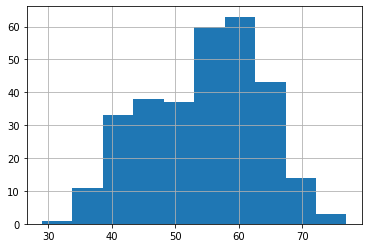

In [ ]:
df['age'].hist()

In [ ]:
df_ha = df[df['output'] == 1]

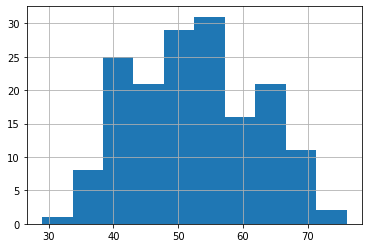

In [ ]:
df_ha['age'].hist()

In [ ]:
df_no = df[df['output'] == 0]

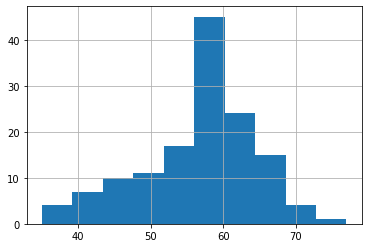

In [ ]:
df_no['age'].hist()

These histograms are a proof that there is no clear correlation between age and a heart attack

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']]

graph for sex: total = 2


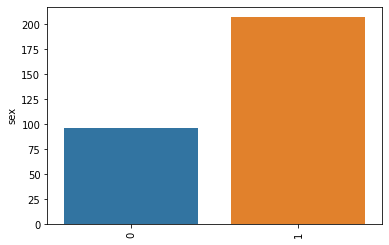

graph for cp: total = 4


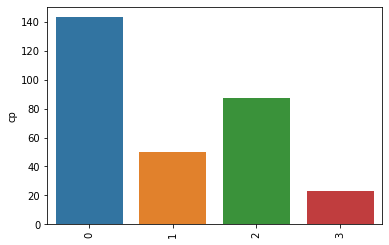

graph for fbs: total = 2


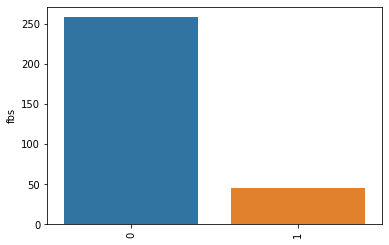

graph for restecg: total = 3


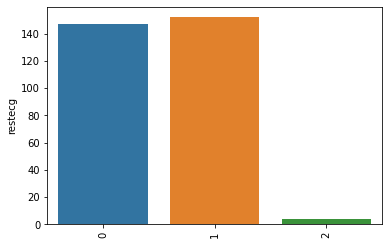

graph for exng: total = 2


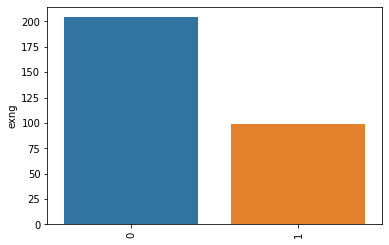

graph for slp: total = 3


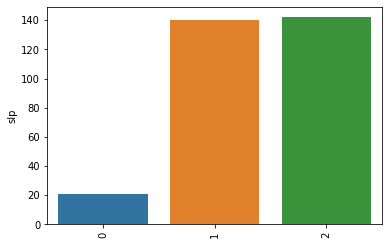

graph for caa: total = 5


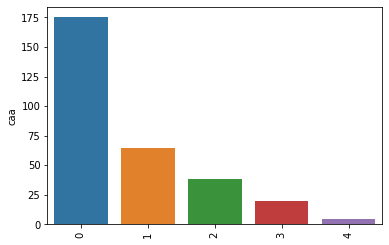

graph for thall: total = 4


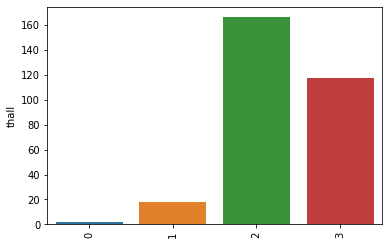

graph for output: total = 2


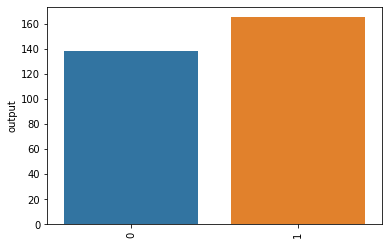

In [ ]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

([<matplotlib.axis.YTick at 0x7f70b4645f50>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'sex'),
  Text(0, 0, 'cp'),
  Text(0, 0, 'trtbps'),
  Text(0, 0, 'chol'),
  Text(0, 0, 'fbs'),
  Text(0, 0, 'restecg'),
  Text(0, 0, 'thalachh'),
  Text(0, 0, 'exng'),
  Text(0, 0, 'oldpeak'),
  Text(0, 0, 'slp'),
  Text(0, 0, 'caa'),
  Text(0, 0, 'thall'),
  Text(0, 0, 'output')])

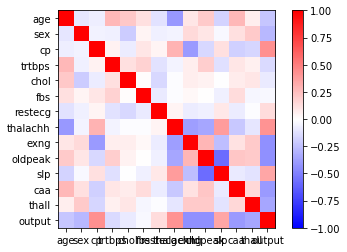

In [ ]:
#Create the correlation table
plt.imshow(df.corr(), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(np.arange(0, 14, 1), df.columns)
plt.yticks(np.arange(0, 14, 1), df.columns)

CP and thalachh seem to be the two variables with the most positive correlation of having a heart attack. 

There are more features that represent a negative correlation of having a heart attack. 
These features are: exng, oldpeak, caa, thall

In [ ]:
target = df['output']
df = df.drop('output', axis=1)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cat.drop('output', axis=1), target, test_size=0.33, random_state=42)

In [ ]:
print(df_cat)

     sex  cp  fbs  restecg  exng  slp  caa  thall  output
0      1   3    1        0     0    0    0      1       1
1      1   2    0        1     0    0    0      2       1
2      0   1    0        0     0    2    0      2       1
3      1   1    0        1     0    2    0      2       1
4      0   0    0        1     1    2    0      2       1
..   ...  ..  ...      ...   ...  ...  ...    ...     ...
298    0   0    0        1     1    1    0      3       0
299    1   3    0        1     0    1    0      3       0
300    1   0    1        1     0    1    2      3       0
301    1   0    0        1     1    1    1      3       0
302    0   1    0        0     0    1    1      2       0

[303 rows x 9 columns]


In [ ]:
X_train

,sex,cp,fbs,restecg,exng,slp,caa,thall
37,1,2,0,0,0,2,0,3
16,0,2,0,1,0,2,0,2
126,1,0,0,1,0,2,0,2
291,1,0,0,2,0,0,3,1
273,1,0,0,1,0,2,1,3
...,...,...,...,...,...,...,...,...
188,1,2,0,1,0,1,1,3
71,1,2,0,1,1,2,1,3
106,1,3,1,0,0,1,1,2
270,1,0,0,0,0,2,0,3


In [ ]:
X_test

,sex,cp,fbs,restecg,exng,slp,caa,thall
179,1,0,0,0,1,1,1,1
228,1,3,0,0,0,1,0,3
111,1,2,1,1,0,2,1,3
246,0,0,0,0,1,1,2,3
60,0,2,1,0,0,2,1,2
...,...,...,...,...,...,...,...,...
163,1,2,0,1,0,2,4,2
155,0,0,0,1,0,1,0,2
97,1,0,1,1,0,2,3,3
68,1,1,0,1,0,2,0,2


In [ ]:
y_train

37     1
16     1
126    1
291    0
273    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 203, dtype: int64

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
163    1
155    1
97     1
68     1
229    0
Name: output, Length: 100, dtype: int64

In [ ]:
def Log_Reg(X=X_train, y=y_train, X2=X_test, y2=y_test):
    clf = LogisticRegression().fit(X, y)
    print(clf.predict(X2))
    
    print(clf.score(X, y))
    print(classification_report(y2, clf.predict(X2)))

    #plt.figure(1, figsize=(4,3))
    #plt.clf()
    #plt.scatter(X, y, color='black', zorder=20)
    #loss = expit(X2 * clf.coef_ + clf.intercept_).ravel()
    #plt.plot(X2, loss, color='red', linewidth=3)

    logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

[0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.82      0.79      0.81        58

    accuracy                           0.78       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



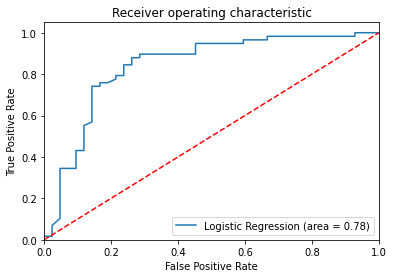

In [ ]:
Log_Reg(X_train, y_train, X_test, y_test)

In [ ]:
def Bayes(X=X_train, y=y_train, X2=X_test, y2=y_test):
    gnb = GaussianNB().fit(X, y)
    print(gnb.predict(X2))
    
    print(gnb.score(X, y))
    print(classification_report(y2, gnb.predict(X2)))

In [ ]:
Bayes(X_train, y_train, X_test, y_test)

[0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0]
0.8768472906403941
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        42
           1       0.85      0.76      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



In [ ]:
def Tree(df=df_cat, target=target, X=X_train, y=y_train, X2=X_test, y2=y_test):
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, y)

  print(clf.predict(X2))
    
  print(clf.score(X, y))
  print(classification_report(y2, clf.predict(X2)))

  plt.figure(figsize=(12, 18))
  tree.plot_tree(clf, fontsize=10)
  plt.show()
  #ot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns, class_names='output', filled=True, rounded=True, special_characters=True)
  #graph = graphviz.Source(dot_data)
  #graph

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0]
0.9458128078817734
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        42
           1       0.85      0.76      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



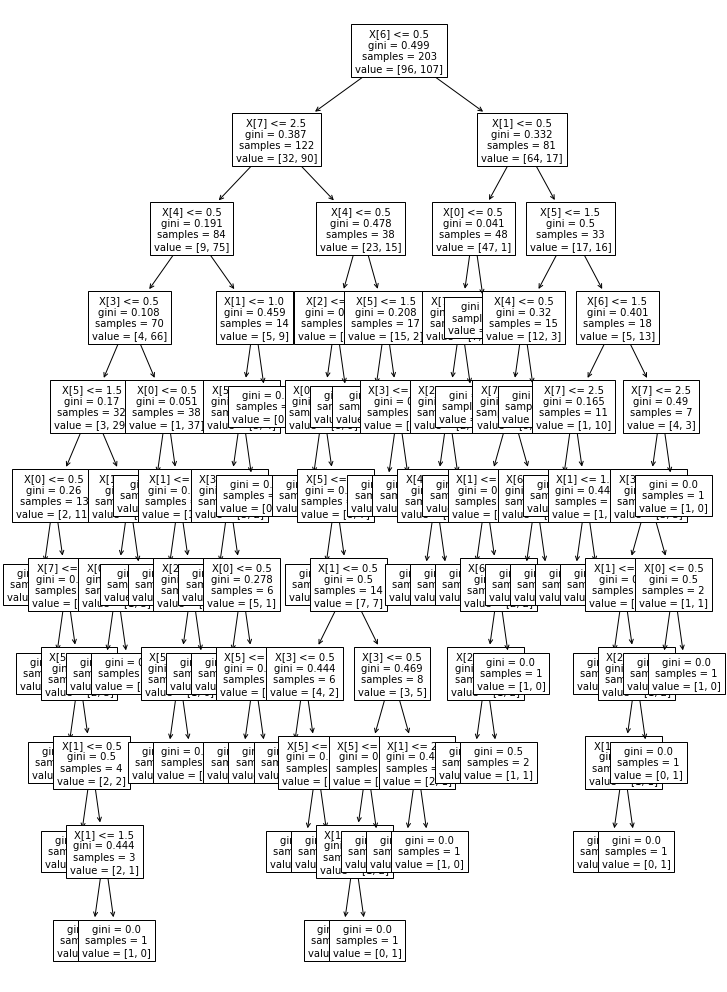

In [ ]:
Tree(df_cat, target, X_train, y_train, X_test, y_test)